**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sys.path.append('./lore/')

In [3]:
from util import record2str, neuclidean
from datamanager import prepare_adult_dataset, prepare_dataset

# Data Preparation

In [4]:
class_name = 'rating'
df = pd.read_csv('imbd_cleaned.csv')

# Mappa di raggruppamento
category_mapping = {
    'movie': 'Movies',
    'tvMovie': 'Movies',
    'short': 'Shorts',
    'tvShort': 'Shorts',
    'tvSeries': 'TV Series',
    'tvMiniSeries': 'TV Series',
    'tvEpisode': 'TV Series',
    'tvSpecial': 'TV Special',
    'video': 'Video',
    'videoGame': 'Videogame'
}

# Applicare la mappa al dataframe
df['titleType'] = df['titleType'].map(category_mapping)
df = df.drop(['averageRating'], axis=1)
df = df.drop(['originalTitle'], axis=1)
df = df.drop(['countryOfOrigin'], axis=1)
df = df.drop(['genres'], axis=1)
df = df.drop(['regions'], axis=1)
df = df.drop(['soundMixes'], axis=1)

df.head()

,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,...,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,castNumber,companiesNumber,externalLinks,writerCredits,directorsCredits,quotesTotal
0,"(5, 6]",1894,1.0,0.000000,7.644919,1.098612,0.0,4,1.386294,Shorts,...,0,0,7,2.833213,0.693147,1.386294,2.302585,0.0,0.693147,0.0
1,"(5, 6]",1892,12.0,0.000000,5.214936,1.098612,0.0,2,0.000000,Shorts,...,0,0,6,0.693147,0.000000,0.000000,1.386294,0.0,0.693147,0.0
2,"(4, 5]",1894,1.0,0.000000,5.278115,0.693147,0.0,1,0.000000,Shorts,...,0,0,5,0.000000,0.000000,0.693147,1.609438,0.0,0.693147,0.0
3,"(5, 6]",1894,1.0,0.693147,7.713338,1.386294,0.0,4,1.098612,Shorts,...,0,0,6,3.044522,0.693147,1.945910,1.945910,0.0,0.693147,0.0
4,"(6, 7]",1894,2.0,0.000000,7.107425,2.772589,0.0,1,0.000000,Shorts,...,0,0,6,2.197225,0.000000,0.000000,1.386294,0.0,0.693147,0.0


In [5]:
res = prepare_dataset(df, class_name)
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df.head()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,AwNmExWins,canHaveEpisodes,...,writerCredits,directorsCredits,quotesTotal,titleType=Movies,titleType=Shorts,titleType=TV Series,titleType=TV Special,titleType=Video,titleType=Videogame,rating
0,1894,1.0,0.000000,7.644919,1.098612,0.0,4,1.386294,0.0,0,...,0.0,0.693147,0.0,False,True,False,False,False,False,5
1,1892,12.0,0.000000,5.214936,1.098612,0.0,2,0.000000,0.0,0,...,0.0,0.693147,0.0,False,True,False,False,False,False,5
2,1894,1.0,0.000000,5.278115,0.693147,0.0,1,0.000000,0.0,0,...,0.0,0.693147,0.0,False,True,False,False,False,False,4
3,1894,1.0,0.693147,7.713338,1.386294,0.0,4,1.098612,0.0,0,...,0.0,0.693147,0.0,False,True,False,False,False,False,5
4,1894,2.0,0.000000,7.107425,2.772589,0.0,1,0.000000,0.0,0,...,0.0,0.693147,0.0,False,True,False,False,False,False,6


In [6]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, f1_score, classification_report

In [7]:
test_size = 0.30
random_state = 0

X_train, X_test, y_train, y_test = train_test_split(
    df[feature_names].values, df[class_name].values,
    test_size=test_size,
    random_state=random_state, 
    stratify=df[class_name].values
)

# Classification

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
bb = RandomForestClassifier(n_estimators=300, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=30, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='sqrt', 
                             random_state=0, 
                             n_jobs=-1)
bb.fit(X_train, y_train)

y_pred = bb.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.42771597739302053
F1-score [0.         0.04166667 0.0056338  0.04436229 0.17529412 0.31284293
 0.41798771 0.56323176 0.2074524  0.1545961 ]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       1.00      0.02      0.04       141
           2       0.50      0.00      0.01       353
           3       0.44      0.02      0.04      1027
           4       0.44      0.11      0.18      2719
           5       0.38      0.26      0.31      6372
           6       0.39      0.44      0.42     11643
           7       0.45      0.75      0.56     14463
           8       0.44      0.14      0.21      6563
           9       0.72      0.09      0.15      1281

    accuracy                           0.43     44588
   macro avg       0.48      0.18      0.19     44588
weighted avg       0.43      0.43      0.38     44588



C:\Users\alban\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alban\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alban\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [10]:
def bb_predict(X):
    return bb.predict(X)

def bb_predict_proba(X):
    return bb.predict_proba(X)

In [11]:
y_pred = bb_predict(X_test)

print('Accuracy %.3f' % accuracy_score(y_test, y_pred))

Accuracy 0.428


## Global

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [13]:
y_pred_train = bb_predict(X_train)

In [14]:
explainer = DecisionTreeClassifier(max_depth=5)
explainer.fit(X_train, y_pred_train)

DecisionTreeClassifier(max_depth=5)

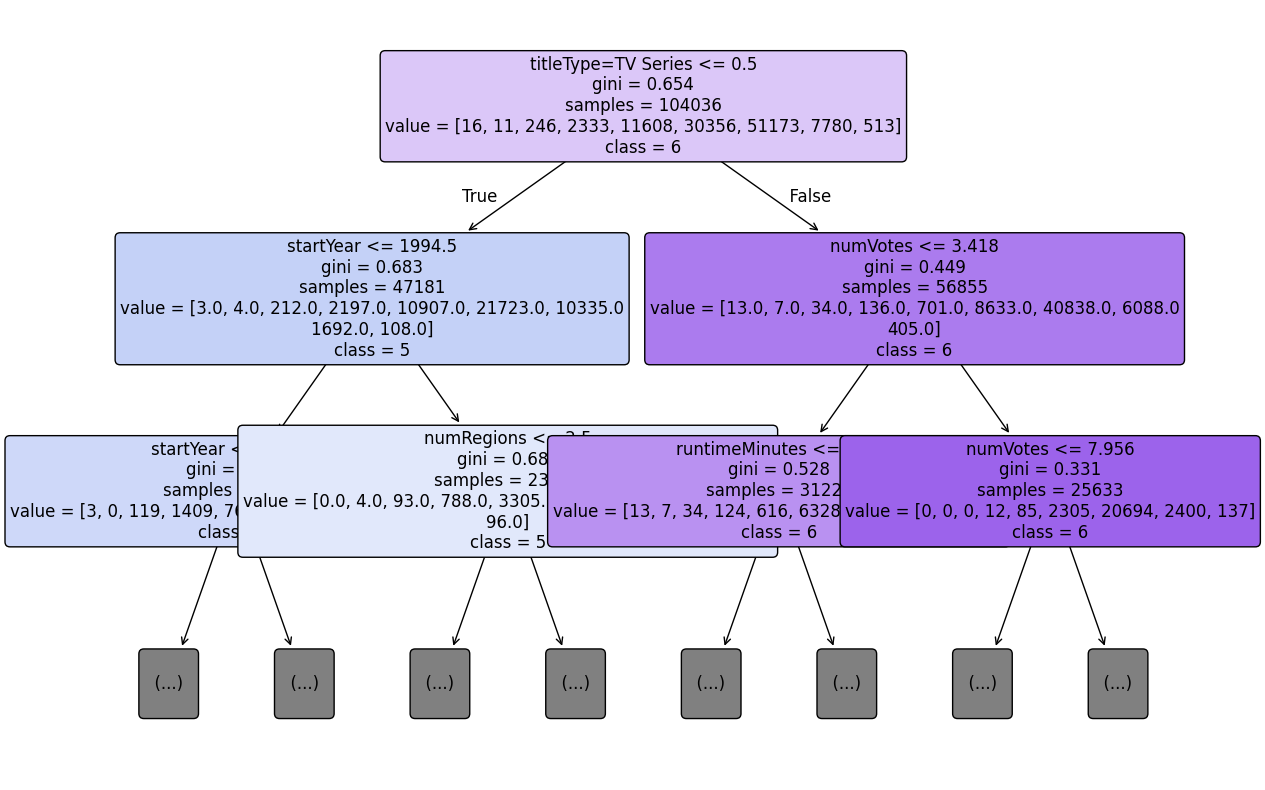

In [23]:
plt.figure(figsize=(14, 10))
plot_tree(explainer, 
          feature_names=feature_names, 
          class_names = [str(cls) for cls in sorted(df[class_name].unique())],  
          filled=True, 
          rounded=True,
          fontsize=12,
          max_depth=2)  
plt.show()

In [24]:
y_pred_explainer = explainer.predict(X_test)
y_pred_bb = bb.predict(X_test)

accuracy_score(y_pred_bb, y_pred_explainer) # fidelity

0.7148111599533506

In [25]:
accuracy_score(y_test, y_pred_explainer)

0.3799677043150623

In [26]:
#codice per stampare i primi 10 (numero a piacere) record con la probabilità più alta

# Ottieni le probabilità e le predizioni
probs = bb.predict_proba(X_test)
preds = bb.predict(X_test)

# Crea DataFrame delle probabilità
probs_df = pd.DataFrame(probs, columns=bb.classes_)

# Calcola la probabilità associata alla classe predetta
prob_pred_class = [
    prob[list(bb.classes_).index(pred)]
    for prob, pred in zip(probs, preds)
]

# Crea il DataFrame con le info
results = probs_df.copy()
results["Classe_predetta"] = preds
results["Probabilità_predetta"] = prob_pred_class

# Ordina per probabilità decrescente e prendi i primi 10
top_10 = results.sort_values(by="Probabilità_predetta", ascending=False).head(10)

# Stampa i top 10
print("I 10 record con la predizione più sicura:")
print(top_10)

I 10 record con la predizione più sicura:
         0         1         2         3         4         5         6  \
19506  0.0  0.000079  0.000079  0.000079  0.000956  0.001207  0.019953   
21195  0.0  0.000079  0.000079  0.000079  0.001107  0.001813  0.020341   
41100  0.0  0.000270  0.000161  0.000167  0.001186  0.004773  0.060002   
14558  0.0  0.000000  0.000000  0.000000  0.000652  0.001583  0.035451   
10424  0.0  0.000000  0.000152  0.000842  0.001151  0.011822  0.031530   
9937   0.0  0.000000  0.000000  0.000000  0.001340  0.001517  0.048552   
33343  0.0  0.000079  0.001466  0.000079  0.001141  0.003145  0.059295   
18498  0.0  0.000155  0.000000  0.000076  0.000958  0.002297  0.071918   
3648   0.0  0.000000  0.000000  0.000074  0.000265  0.002787  0.047011   
3701   0.0  0.000098  0.000269  0.000068  0.000973  0.005840  0.078489   

              7         8         9  Classe_predetta  Probabilità_predetta  
19506  0.962015  0.015078  0.000553                7              

In [27]:
# Ottieni predizioni e probabilità
probs = bb.predict_proba(X_test)
preds = bb.predict(X_test)

# Crea DataFrame delle probabilità
probs_df = pd.DataFrame(probs, columns=bb.classes_)

# Calcola la probabilità associata alla classe predetta
prob_pred_class = [
    prob[list(bb.classes_).index(pred)]
    for prob, pred in zip(probs, preds)
]

# Etichette vere (true labels)
# Assumo che le etichette vere siano contenute in y_test
# Se usi un'altra variabile, cambia qui
true_labels = np.array(y_test)

# Costruisci il DataFrame dei risultati
results = probs_df.copy()
results["Classe_predetta"] = preds
results["Classe_reale"] = true_labels
results["Probabilità_predetta"] = prob_pred_class

# Filtra solo gli errori
errori = results[results["Classe_predetta"] != results["Classe_reale"]]

# Ordina gli errori per la sicurezza della predizione (in modo decrescente)
errori_top10 = errori.sort_values(by="Probabilità_predetta", ascending=False).head(10)

# Stampa i 10 errori più "sicuri"
print("I 10 errori più sicuri (alta confidenza ma sbagliati):")
print(errori_top10)

I 10 errori più sicuri (alta confidenza ma sbagliati):
         0         1         2         3         4         5         6  \
14558  0.0  0.000000  0.000000  0.000000  0.000652  0.001583  0.035451   
37299  0.0  0.000000  0.000000  0.000000  0.001730  0.002243  0.047913   
36142  0.0  0.000417  0.000370  0.000716  0.000955  0.004006  0.076700   
42011  0.0  0.000000  0.000269  0.000068  0.001060  0.003417  0.094780   
3931   0.0  0.000128  0.000000  0.000064  0.000265  0.003557  0.037269   
34005  0.0  0.000572  0.000370  0.000076  0.000887  0.006634  0.088131   
37097  0.0  0.000000  0.000000  0.000000  0.001728  0.002136  0.037057   
35523  0.0  0.000000  0.000000  0.000000  0.000783  0.003441  0.055124   
26702  0.0  0.000000  0.000000  0.000088  0.004170  0.008563  0.048649   
36759  0.0  0.000000  0.000000  0.000000  0.001056  0.004832  0.081429   

              7         8         9  Classe_predetta  Classe_reale  \
14558  0.911548  0.050441  0.000325                7        

## Local

In [28]:
i2e = 22
x = X_test[i2e]
x

array([1995, 4.0, 0.6931471805599453, 2.70805020110221, 0.0, 0.0, 9, 0.0,
       0.0, 0, 0, 1, 0.6931471805599453, 0.0, 0.6931471805599453, 0.0,
       0.6931471805599453, 0.6931471805599453, 0.0, False, True, False,
       False, False, False], dtype=object)

In [29]:
record2str(x, feature_names, numeric_columns)

'{ startYear = 1995, runtimeMinutes = 4.0, awardWins = 0.6931471805599453, numVotes = 2.70805020110221, totalImages = 0.0, totalVideos = 0.0, totalCredits = 9, criticReviewsTotal = 0.0, AwNmExWins = 0.0, canHaveEpisodes = 0, isAdult = 0, numRegions = 1, userReviewsTotal = 0.6931471805599453, castNumber = 0.0, companiesNumber = 0.6931471805599453, externalLinks = 0.0, writerCredits = 0.6931471805599453, directorsCredits = 0.6931471805599453, quotesTotal = 0.0, titleType = Shorts }'

In [30]:
bb_outcome = int(bb_predict(x.reshape(1, -1))[0])
bb_outcome_str = class_values[bb_outcome]

print('bb(x) = { %s }' % bb_outcome_str)
print('')

true_outcome = y_test[i2e]
true_outcome_str = class_values[true_outcome]
print('True class = { %s }' % true_outcome_str)

bb(x) = { (6, 7] }

True class = { (4, 5] }


### LIME

In [24]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 8.9 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=acc1859914337a2f833c2971831f35854364227bb9d108c668193addaabbd6f4
  Stored in directory: /Users/riccardo/Library/Caches/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [26]:
from lime.lime_tabular import LimeTabularExplainer

ModuleNotFoundError: No module named 'lime'

In [27]:
lime_explainer = LimeTabularExplainer(
    X_train,
    feature_names=feature_names,
    class_names=[str(v) for v in class_values], 
    discretize_continuous=False
)

NameError: name 'LimeTabularExplainer' is not defined

In [22]:
exp = lime_explainer.explain_instance(x, bb_predict_proba)

In [23]:
exp.local_exp

{1: [(3, 0.028424024248085836),
  (15, 0.02554195411837891),
  (5, 0.025487619020207433),
  (68, 0.018491340043757413),
  (13, -0.013857357304225099),
  (67, -0.012807934982294197),
  (70, -0.012370586877377484),
  (12, 0.006424996507471325),
  (14, 0.0026503894569399073),
  (60, 0.0017357014033485205)]}

In [24]:
exp.show_in_notebook()

### SHAP

In [25]:
# !pip install shap

In [26]:
import shap
shap.initjs()

In [27]:
f = lambda x: bb_predict_proba(x)[:, 1]
med = np.median(X_train, axis=0).reshape((1, X_train.shape[1]))

shap_explainer = shap.KernelExplainer(f, med)

In [28]:
shap_values_single = shap_explainer.shap_values(x, nsamples=1000)

In [29]:
shap_values_single

array([-0.00858483,  0.        ,  0.        ,  0.41514777, -0.0161148 ,
        0.33073304,  0.02127987, -0.01231674,  0.01353242,  0.        ,
        0.        ,  0.        ,  0.01864811, -0.03124229,  0.02486306,
       -0.02039892,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.01445331,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [30]:
shap.force_plot(shap_explainer.expected_value, shap_values_single, features=x, feature_names=feature_names)

### LORE

In [31]:
from lorem import LOREM

In [32]:
_, K, _, _ = train_test_split(
    rdf[real_feature_names].values, 
    rdf[class_name].values, 
    test_size=test_size,
    random_state=random_state, 
    stratify=df[class_name].values
)

In [33]:
lore_explainer = LOREM(K, bb_predict, feature_names, class_name, class_values, numeric_columns, features_map,
                       neigh_type='geneticp', categorical_use_prob=True, continuous_fun_estimation=False, 
                       size=1000, ocr=0.1, random_state=42, ngen=10, bb_predict_proba=bb_predict_proba, 
                       verbose=True)

calculating feature values


In [34]:
exp = lore_explainer.explain_instance(x, samples=300, use_weights=True, metric=neuclidean)

generating neighborhood - geneticp
gen	nevals	avg     	min     	max     
0  	150   	0.496654	0.496654	0.496654
1  	133   	0.740517	0.496654	0.993191
2  	133   	0.9845  	0.496654	0.993281
3  	127   	0.991935	0.984419	0.993239
4  	129   	0.99195 	0.981532	0.993239
5  	124   	0.991305	0.940718	0.993273
6  	130   	0.991785	0.978959	0.993273
7  	132   	0.992168	0.984311	0.993273
8  	125   	0.992051	0.961558	0.993279
9  	125   	0.991896	0.978984	0.993273
10 	127   	0.991812	0.978578	0.993273
gen	nevals	avg	min	max
0  	150   	0.5	0.5	0.5
1  	131   	0.501178	0.5	0.511542
2  	130   	0.503135	0.5	0.520449
3  	138   	0.504686	0.500148	0.531839
4  	123   	0.506431	0.500156	0.523533
5  	132   	0.508759	0.5001  	0.545229
6  	136   	0.510332	0.500114	0.549117
7  	128   	0.511328	0.500442	0.549686
8  	130   	0.51337 	0.500107	0.567818
9  	127   	0.514609	0.500101	0.567818
10 	129   	0.517445	0.500962	0.567818
synthetic neighborhood class counts {'(6, 7]': np.int64(131), '(7, 8]': np.int64(146), '(8, 9

In [35]:
print(exp)

r = { titleType != TV Series, awardWins <= 0.99, startYear <= 1996.50, totalImages <= 4.09, directorsCredits > 0.35, titleType != TV Special } --> { rating: (6, 7] }
c = { { titleType = TV Series } }


In [36]:
x1 = x.copy()
x1[feature_names.index('total eve minutes')] = 170

print('x1 = %s' % record2str(x1, feature_names, numeric_columns))
print('')

ValueError: 'total eve minutes' is not in list

In [27]:
bb_outcome = bb_predict(x1.reshape(1, -1))[0]
bb_outcome_str = class_values[bb_outcome]

print('bb(x) = { %s }' % bb_outcome_str)
print('')

bb(x) = { False }



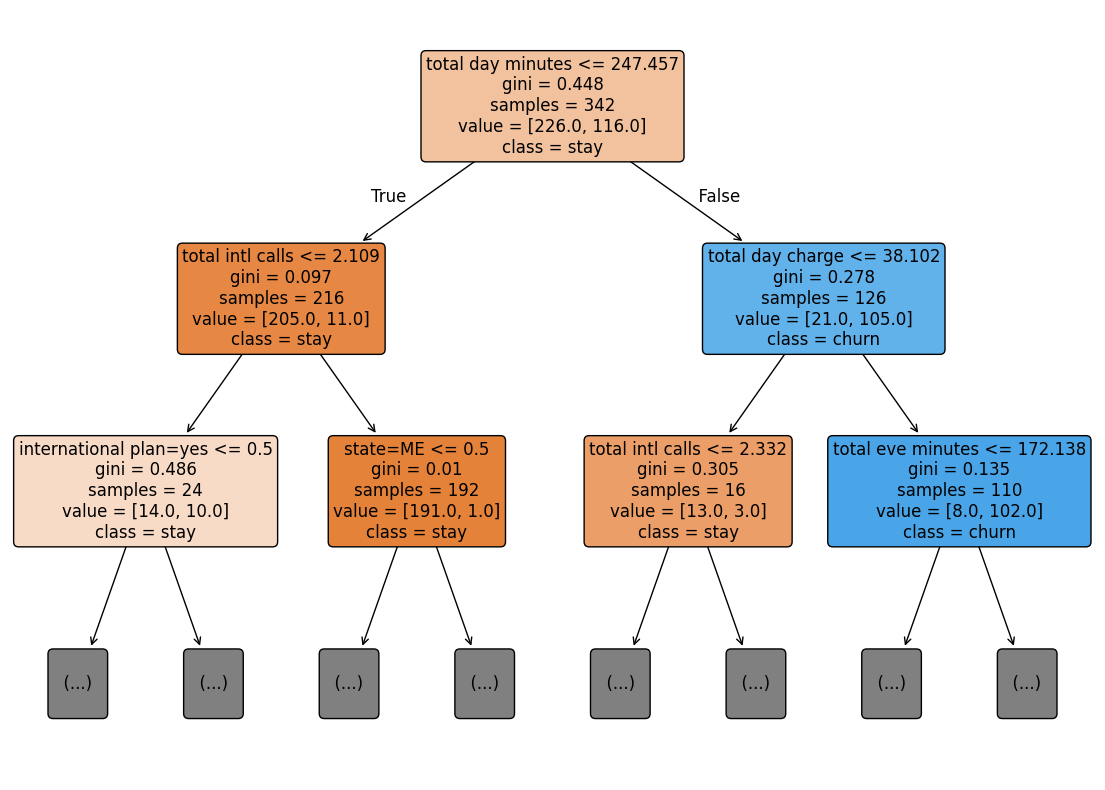

In [28]:
plt.figure(figsize=(14, 10))
plot_tree(exp.dt, 
          feature_names=feature_names, 
          class_names=['stay', 'churn'], 
          filled=True, 
          rounded=True,
          fontsize=12,
          max_depth=2)  
plt.show()

### Counterfactual Explanations

In [29]:
!pip install fat-forensics

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import fatf.transparency.predictions.counterfactuals as fatf_cf

25-Jun-08 23:06:50 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


In [38]:
# Create a Counterfactual Explainer
cf_explainer = fatf_cf.CounterfactualExplainer(
    model=bb,
    dataset=X_test.astype(float), # cast booleans to float, library dataset has to be of a base type (strings and/or numbers).
    categorical_indices=[],
    default_numerical_step_size=1,
    max_counterfactual_length=1
)

In [39]:
dp_1_cf_tuple = cf_explainer.explain_instance(x1.astype(float))
dp_1_cfs, dp_1_cfs_distances, dp_1_cfs_predictions = dp_1_cf_tuple

In [40]:
dp_1_cfs

array([[1.99500000e+03, 4.00000000e+00, 6.93147181e-01, 2.70805020e+00,
        0.00000000e+00, 0.00000000e+00, 9.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        6.93147181e-01, 0.00000000e+00, 6.93147181e-01, 0.00000000e+00,
        6.93147181e-01, 6.93147181e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.99500000e+03, 2.70000000e+01, 6.93147181e-01, 2.70805020e+00,
        0.00000000e+00, 0.00000000e+00, 9.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        6.93147181e-01, 0.00000000e+00, 6.93147181e-01, 0.00000000e+00,
        6.93147181e-01, 6.93147181e-01, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.94500000e+03, 4.00000000e+00, 6.93147181e-01, 2.70805020e+00,
        0.0000

In [41]:
dp_1_cfs_text = fatf_cf.textualise_counterfactuals(
    x1.astype(float),
    dp_1_cfs,
    instance_class=bb_outcome,
    counterfactuals_distances=dp_1_cfs_distances,
    counterfactuals_predictions=dp_1_cfs_predictions)
print(dp_1_cfs_text)

Instance (of class *6*):
[1.99500000e+03 4.00000000e+00 6.93147181e-01 2.70805020e+00
 0.00000000e+00 0.00000000e+00 9.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 6.93147181e-01 0.00000000e+00 6.93147181e-01 0.00000000e+00
 6.93147181e-01 6.93147181e-01 0.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]

Feature names: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

Counterfactual instance (of class *7*):
Distance: 1.0
    feature *20*: *1.0* -> *0.0*

Counterfactual instance (of class *7*):
Distance: 23.0
    feature *1*: *4.0* -> *27.0*

Counterfactual instance (of class *5*):
Distance: 50.0
    feature *0*: *1995.0* -> *1945.0*


### DALEX

- https://dalex.drwhy.ai/python-dalex-titanic.html
- https://github.com/ModelOriented/DALEX